<a href="https://colab.research.google.com/github/kaybrian/ML_/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/titanic.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df = data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked', 'Cabin'],axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [10]:
# encode the sex to either 0 or 1
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [11]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
888,0,3,1,NaN,23.4500
889,1,1,0,26.0,30.0000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [13]:
# fill the missing age of the passengers to be the mean of the ages
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208
std,0.486592,0.836071,0.477990,13.002015,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400
50%,0.000000,3.000000,0.000000,29.699118,14.454200
75%,1.000000,3.000000,1.000000,35.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


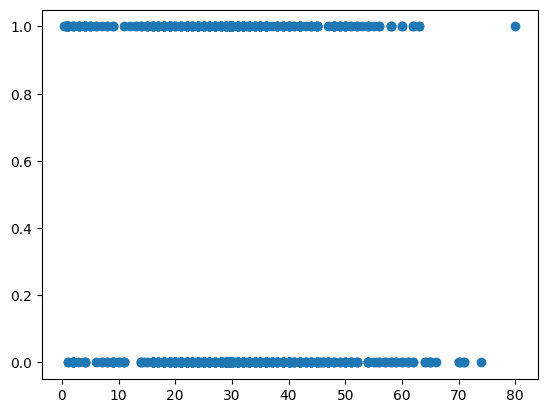

In [15]:
# plot a scatter plot for the ages and Survived
plt.scatter(df['Age'],df['Survived'])
plt.show()

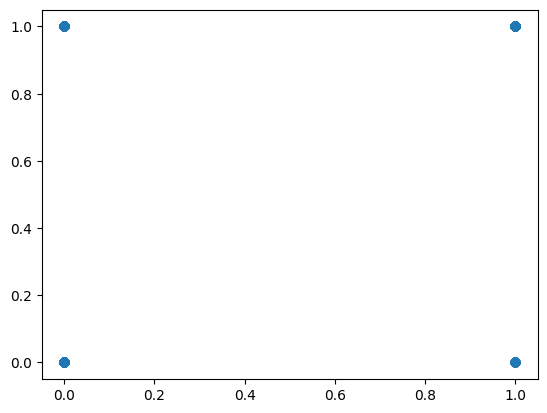

In [16]:
# make a scatter plot for sex and Survived
plt.scatter(df['Sex'],df['Survived'])
plt.show()

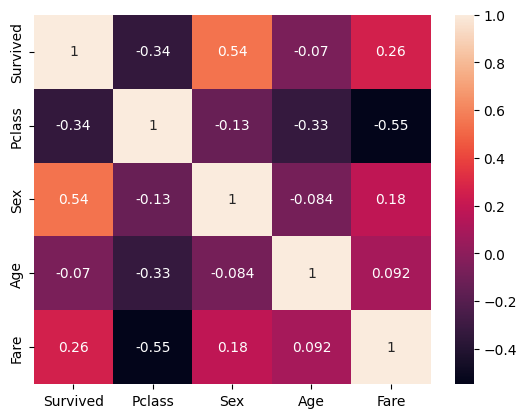

In [17]:
# get the heat map of the data
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
# extract the targets and features of the data
X = df.drop('Survived',axis=1)
y = df['Survived']

# split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)


In [19]:
len(X)

891

In [20]:
len(X_train)

712

In [21]:
# build the model classifer for the data using the decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


# fit the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
# make predictions based off the test set
predictions = dtree.predict(X_test)


In [23]:
# get the model accurancy
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))



              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.71      0.69      0.70        80

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

[[77 22]
 [25 55]]


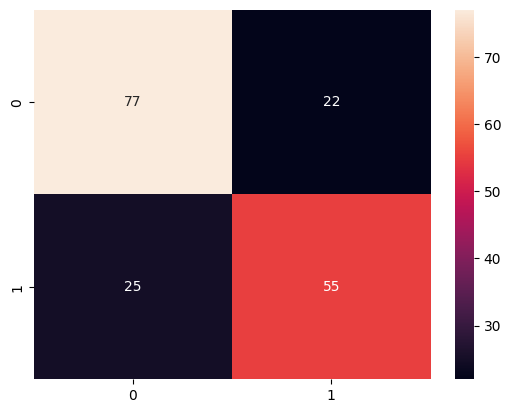

In [25]:
# plot the confustion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)
plt.show()